# Loading everything

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from statistics import mean

In [2]:
batch1 = pickle.load(open(r'batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [3]:
numBat1 = len(batch1.keys())
numBat1

41

In [4]:
batch2 = pickle.load(open(r'batch2.pkl','rb'))

In [5]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [6]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [7]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [8]:
numBat2 = len(batch2.keys())
numBat2

43

In [9]:
batch3 = pickle.load(open(r'batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

In [10]:
numBat3 = len(batch3.keys())
numBat3

40

In [11]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [12]:
bat_dict = {**batch1, **batch2, **batch3}

In [13]:
for i in bat_dict.keys():
    print(i)

b1c0
b1c1
b1c2
b1c3
b1c4
b1c5
b1c6
b1c7
b1c9
b1c11
b1c14
b1c15
b1c16
b1c17
b1c18
b1c19
b1c20
b1c21
b1c23
b1c24
b1c25
b1c26
b1c27
b1c28
b1c29
b1c30
b1c31
b1c32
b1c33
b1c34
b1c35
b1c36
b1c37
b1c38
b1c39
b1c40
b1c41
b1c42
b1c43
b1c44
b1c45
b2c0
b2c1
b2c2
b2c3
b2c4
b2c5
b2c6
b2c10
b2c11
b2c12
b2c13
b2c14
b2c17
b2c18
b2c19
b2c20
b2c21
b2c22
b2c23
b2c24
b2c25
b2c26
b2c27
b2c28
b2c29
b2c30
b2c31
b2c32
b2c33
b2c34
b2c35
b2c36
b2c37
b2c38
b2c39
b2c40
b2c41
b2c42
b2c43
b2c44
b2c45
b2c46
b2c47
b3c0
b3c1
b3c3
b3c4
b3c5
b3c6
b3c7
b3c8
b3c9
b3c10
b3c11
b3c12
b3c13
b3c14
b3c15
b3c16
b3c17
b3c18
b3c19
b3c20
b3c21
b3c22
b3c24
b3c25
b3c26
b3c27
b3c28
b3c29
b3c30
b3c31
b3c33
b3c34
b3c35
b3c36
b3c38
b3c39
b3c40
b3c41
b3c44
b3c45


# Getting all the features

In [14]:
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [15]:
features_df = pd.DataFrame()

In [16]:
minimum_dQ_100_10 = np.zeros(len(bat_dict.keys()))
variance_dQ_100_10 = np.zeros(len(bat_dict.keys()))
skewness_dQ_100_10 = np.zeros(len(bat_dict.keys()))
kurtosis_dQ_100_10 = np.zeros(len(bat_dict.keys()))

for i, cell in enumerate(bat_dict.values()):
    c10 = cell['cycles']['10']
    c100 = cell['cycles']['100']
    dQ_100_10 = c100['Qdlin'] - c10['Qdlin']
    
    minimum_dQ_100_10[i] = np.log(np.abs(np.min(dQ_100_10)))
    variance_dQ_100_10[i] = np.log(np.var(dQ_100_10))
    skewness_dQ_100_10[i] = np.log(np.abs(skew(dQ_100_10)))
    kurtosis_dQ_100_10[i] = np.log(np.abs(kurtosis(dQ_100_10)))

features_df["minimum_dQ_100_10"] = minimum_dQ_100_10
features_df["variance_dQ_100_10"] = variance_dQ_100_10
features_df["skewness_dQ_100_10"] = skewness_dQ_100_10
features_df["kurtosis_dQ_100_10"] = kurtosis_dQ_100_10


slope_lin_fit_2_100 = np.zeros(len(bat_dict.keys()))
intercept_lin_fit_2_100 = np.zeros(len(bat_dict.keys()))
discharge_capacity_2 = np.zeros(len(bat_dict.keys()))
diff_discharge_capacity_max_2 = np.zeros(len(bat_dict.keys()))

for i, cell in enumerate(bat_dict.values()):
    # Compute linear fit for cycles 2 to 100:
    q = cell['summary']['QD'][1:100].reshape(-1, 1)  # discharge cappacities; q.shape = (99, 1); 
    X = cycle_numbers = cell['summary']['cycle'][1:100].reshape(-1, 1)  # Cylce index from 2 to 100; X.shape = (99, 1)
    
    linear_regressor_2_100 = LinearRegression()
    linear_regressor_2_100.fit(X, q)
    
    slope_lin_fit_2_100[i] = linear_regressor_2_100.coef_[0]
    intercept_lin_fit_2_100[i] = linear_regressor_2_100.intercept_
    discharge_capacity_2[i] = q[0][0]
    diff_discharge_capacity_max_2[i] = np.max(q) - q[0][0]
    
features_df["slope_lin_fit_2_100"] = slope_lin_fit_2_100
features_df["intercept_lin_fit_2_100"] = intercept_lin_fit_2_100
features_df["discharge_capacity_2"] = discharge_capacity_2
features_df["diff_discharge_capacity_max_2"] = diff_discharge_capacity_max_2

mean_charge_time = np.zeros(len(bat_dict.keys()))
minimum_IR = np.zeros(len(bat_dict.keys()))
diff_IR_100_2 = np.zeros(len(bat_dict.keys()))


for i, cell in enumerate(bat_dict.values()):
    mean_charge_time[i] = np.mean(cell['summary']['chargetime'][1:6])
    minimum_IR[i] = np.min(cell['summary']['IR'][1:100])
    diff_IR_100_2[i] = cell['summary']['IR'][100] - cell['summary']['IR'][1]
    
features_df["mean_charge_time"] = mean_charge_time
features_df["minimum_IR"] = minimum_IR
features_df["diff_IR_100_2"] = diff_IR_100_2

In [17]:
features_df.head()

,minimum_dQ_100_10,variance_dQ_100_10,skewness_dQ_100_10,kurtosis_dQ_100_10,slope_lin_fit_2_100,intercept_lin_fit_2_100,discharge_capacity_2,diff_discharge_capacity_max_2,mean_charge_time,minimum_IR,diff_IR_100_2
0,-4.720901,-11.631570,-0.319238,-0.094314,-0.000207,1.091144,1.070689,0.468365,13.374894,0.016444,-0.000092
1,-4.709132,-11.825562,-1.148991,0.037823,0.000006,1.080965,1.075301,0.009288,13.409150,0.000000,-0.000034
2,-4.575223,-11.402131,-0.826717,0.160194,0.000010,1.084846,1.079922,0.008131,13.358242,0.000000,-0.000009
3,-3.922042,-10.099939,-0.741646,0.117089,0.000017,1.084075,1.079723,0.006530,12.025140,0.000000,0.000044
4,-4.230762,-10.602896,-1.052154,0.308340,0.000019,1.081875,1.078417,0.005900,12.041851,0.000000,-0.000036


In [18]:
features_df.shape

(124, 11)

In [19]:
cols = features_df.columns

# Splitting the data 80-20

In [20]:
target_df = pd.DataFrame()
cycle_life = []
for i in bat_dict:
    cycle_life.append(np.float(bat_dict[i]["cycle_life"]))
cycle_life = pd.Series(cycle_life)
target_df["cycle_life"] = cycle_life
target_df.head()

,cycle_life
0,1852.0
1,2160.0
2,2237.0
3,1434.0
4,1709.0


In [21]:
x = features_df
y = cycle_life

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

In [23]:
x_train_columns = x_train.columns
x_test_columns = x_test.columns

In [24]:
x_train_index = x_train.index
x_test_index = x_test.index

# APPROACH 1

## DISCHARGE

In [27]:
v_weights = np.linspace(0,1,11,True)
m_weights = np.linspace(0,1,11,True)
d_weights = np.linspace(0,1,11,True)

In [41]:
error_list = []
real_lifetime_list = []
predicted_lifetime_list = []
cell_number_train = []
variance_test = []
variance_train = []
minimum_test = []
minimum_train = []
skewness_test = []
skewness_train = []
kurtosis_test = []
kurtosis_train = []
dc2_test = []
dc2_train = []
ddc2_test = []
ddc2_train = []

tuning_df = pd.DataFrame(columns=['variance_weight', 'minimum_weight', 'ddc2_weight', 'error'])
variance_weight = []
minimum_weight = []
ddc2_weight = []
minimum_tuning_df_error = []
mean_error_list  = []

for v_weight in v_weights:
    
    
    for m_weight in m_weights:

        for d_weight in d_weights:

            error_list = []
            for i in x_test.index:
                #defining stuff
                df = pd.DataFrame()
                #variance
                df["cell_test_variance"] = pd.Series()
                df["cell_train_variance"] = pd.Series()
                #minimum
                df["cell_test_minimum"] = pd.Series()
                df["cell_train_minimum"] = pd.Series()
                #skewness
                df["cell_test_skewness"] = pd.Series()
                df["cell_train_skewness"] = pd.Series()
                #kurtosis
                df["cell_test_kurtosis"] = pd.Series()
                df["cell_train_kurtosis"] = pd.Series()
                #discharge capacity at cycle 2
                df["cell_test_dc2"] = pd.Series()
                df["cell_train_dc2"] = pd.Series()
                #diff discharge capacity max 2
                df["cell_test_ddc2"] = pd.Series()
                df["cell_train_ddc2"] = pd.Series()
                #distance
                df["distance"] = pd.Series()

                #test lists
                cell_test_variance = []
                cell_test_minimum = []
                cell_test_skewness = []
                cell_test_kurtosis = []
                cell_test_dc2 = []
                cell_test_ddc2 = []

                #train lists
                cell_train_variance = []
                cell_train_minimum = []
                cell_train_skewness = []
                cell_train_kurtosis = []
                cell_train_dc2 = []
                cell_train_ddc2 = []

                #creating df
                for b in range(len(x_train.index)):
                    cell_test_variance.append(x_test["variance_dQ_100_10"][i]*v_weight)
                    cell_test_minimum.append(x_test["minimum_dQ_100_10"][i]*m_weight)
                    cell_test_skewness.append(x_test["skewness_dQ_100_10"][i])
                    cell_test_kurtosis.append(x_test["kurtosis_dQ_100_10"][i])
                    cell_test_dc2.append(x_test["discharge_capacity_2"][i]*d_weight)
                    cell_test_ddc2.append(x_test["diff_discharge_capacity_max_2"][i])

                for a in x_train.index:
                    cell_train_variance.append(x_train["variance_dQ_100_10"][a]*v_weight)
                    cell_train_minimum.append(x_train["minimum_dQ_100_10"][a]*m_weight)
                    cell_train_skewness.append(x_train["skewness_dQ_100_10"][a])
                    cell_train_kurtosis.append(x_train["kurtosis_dQ_100_10"][a])
                    cell_train_dc2.append(x_train["discharge_capacity_2"][a]*d_weight)
                    cell_train_ddc2.append(x_train["diff_discharge_capacity_max_2"][a])
                
                df["cell_test_variance"] = pd.Series(cell_test_variance)
                df["cell_test_minimum"] = pd.Series(cell_test_minimum)
                df["cell_test_skewness"] = pd.Series(cell_test_skewness)
                df["cell_test_kurtosis"] = pd.Series(cell_test_kurtosis)
                df["cell_test_dc2"] = pd.Series(cell_test_dc2)
                df["cell_test_ddc2"] = pd.Series(cell_test_ddc2)

                df["cell_train_variance"] = pd.Series(cell_train_variance)
                df["cell_train_minimum"] = pd.Series(cell_train_minimum)
                df["cell_train_skewness"] = pd.Series(cell_train_skewness)
                df["cell_train_kurtosis"] = pd.Series(cell_train_kurtosis)
                df["cell_train_dc2"] = pd.Series(cell_train_dc2)
                df["cell_train_ddc2"] = pd.Series(cell_train_ddc2)

                
                a = (df["cell_test_variance"] - df["cell_train_variance"])**2
                b = (df["cell_test_minimum"] - df["cell_train_minimum"])**2
                c = (df["cell_test_skewness"] - df["cell_train_skewness"])**2
                d = (df["cell_test_kurtosis"] - df["cell_train_kurtosis"])**2
                e = (df["cell_test_dc2"] - df["cell_train_dc2"])**2
                f = (df["cell_test_ddc2"] - df["cell_train_ddc2"])**2

                df["distance"] = np.sqrt(a+b+c+d+e+f)

                #finding the most similar cell
                minimum = min(df["distance"])
                cell_number_train.append(df["cell_train_variance"].loc[df["distance"]==minimum].index[0])
                number = df["cell_train_variance"].loc[df["distance"]==minimum].index[0]
                #append features to csv
                variance_test.append(x_test["variance_dQ_100_10"][i])
                variance_train.append(x_train["variance_dQ_100_10"][number])
                minimum_test.append(x_test["variance_dQ_100_10"][i])
                minimum_train.append(x_train["variance_dQ_100_10"][number])
                skewness_test.append(x_test["variance_dQ_100_10"][i])
                skewness_train.append(x_train["variance_dQ_100_10"][number])
                kurtosis_test.append(x_test["variance_dQ_100_10"][i])
                kurtosis_train.append(x_train["variance_dQ_100_10"][number])
                dc2_test.append(x_test["variance_dQ_100_10"][i])
                dc2_train.append(x_train["variance_dQ_100_10"][number])
                ddc2_test.append(x_test["variance_dQ_100_10"][i])
                ddc2_train.append(x_train["variance_dQ_100_10"][number])
                
                #calculating the error
                real_lifetime = y_test[i]
                real_lifetime_list.append(float(real_lifetime))

                predicted_lifetime = y_train[df.loc[df['distance'] == minimum].index]
                predicted_lifetime_list.append(float(predicted_lifetime))

                error = float(abs(real_lifetime - predicted_lifetime))
                error = error/real_lifetime
                error_list.append(error*100)

            mean_error_list.append(np.array(error_list).mean())
            variance_weight.append(v_weight)
            minimum_weight.append(m_weight)
            ddc2_weight.append(d_weight)
    
tuning_df["variance_weight"] = pd.Series(variance_weight)
tuning_df["minimum_weight"] = pd.Series(minimum_weight)
tuning_df["ddc2_weight"] = pd.Series(ddc2_weight)
tuning_df["error"] = pd.Series(mean_error_list)



#creating CSV df
csv_df = pd.DataFrame()
csv_df["cell_number_test"] = pd.Series(list(x_test.index))
csv_df["cell_number_train"] = pd.Series(cell_number_train)
csv_df["variance_test"] = pd.Series(variance_test)
csv_df["variance_train"] = pd.Series(variance_train)
csv_df["minimum_test"] = pd.Series(minimum_test)
csv_df["minimum_train"] = pd.Series(minimum_train)
csv_df["skewness_test"] = pd.Series(skewness_test)
csv_df["skewness_train"] = pd.Series(skewness_train)
csv_df["kurtosis_test"] = pd.Series(kurtosis_test)
csv_df["kurtosis_train"] = pd.Series(kurtosis_train)
csv_df["dc2_test"] = pd.Series(dc2_test)
csv_df["dc2_train"] = pd.Series(dc2_train)
csv_df["ddc2_test"] = pd.Series(ddc2_test)
csv_df["ddc2_test"] = pd.Series(ddc2_test)
csv_df["prediction"] = pd.Series(predicted_lifetime_list)
csv_df["real"] = pd.Series(real_lifetime_list)
csv_df["error"] = pd.Series(error_list)
csv_df.to_csv('normalized_discharge_app1.csv') 

/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:38: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: The default dtype for empty Series will be

In [42]:
tuning_df

,variance_weight,minimum_weight,ddc2_weight,error
0,0.0,0.0,0.0,47.102878
1,0.0,0.0,0.1,47.102878
2,0.0,0.0,0.2,47.102878
3,0.0,0.0,0.3,47.102878
4,0.0,0.0,0.4,47.102878
...,...,...,...,...
1326,1.0,1.0,0.6,19.899783
1327,1.0,1.0,0.7,19.899783
1328,1.0,1.0,0.8,19.899783
1329,1.0,1.0,0.9,19.899783


In [43]:
min(tuning_df["error"])

17.343273513598056

## FULL MODEL

In [29]:
v_weights = np.linspace(0,1,11,True)
m_weights = np.linspace(0,1,11,True)
mct_weights = np.linspace(0,1,11,True)

In [45]:
error_list = []
real_lifetime_list = []
predicted_lifetime_list = []
cell_number_train = []
variance_test = []
variance_train = []
minimum_test = []
minimum_train = []
slope_lin_fit_2_100_test = []
slope_lin_fit_2_100_train = []
intercept_lin_fit_2_100_test = []
intercept_lin_fit_2_100_train = []
dc2_test = []
dc2_train = []
mean_charge_time_test = []
mean_charge_time_train = []
minimumIR_test = []
minimumIR_train = []
diff_IR_100_2_test = []
diff_IR_100_2_train = []


tuning_df = pd.DataFrame(columns=['variance_weight', 'minimum_weight', 'mean_charge_time_weight', 'error'])
variance_weight = []
minimum_weight = []
mean_charge_time_weight = []
minimum_tuning_df_error = []
mean_error_list  = []

for v_weight in v_weights:

    for m_weight in m_weights:

        for mct_weight in mct_weights:

            error_list = []
            for i in x_test.index:
                #defining stuff
                df = pd.DataFrame()
                #variance
                df["cell_test_variance"] = pd.Series()
                df["cell_train_variance"] = pd.Series()
                #minimum
                df["cell_test_minimum"] = pd.Series()
                df["cell_train_minimum"] = pd.Series()
                #slope_lin_fit_2_100
                df["cell_test_slope_lin_fit_2_100"] = pd.Series()
                df["cell_train_slope_lin_fit_2_100"] = pd.Series()
                #intercept_lin_fit_2_100
                df["cell_test_intercept_lin_fit_2_100"] = pd.Series()
                df["cell_train_intercept_lin_fit_2_100"] = pd.Series()
                #discharge capacity at cycle 2
                df["cell_test_dc2"] = pd.Series()
                df["cell_train_dc2"] = pd.Series()
                #mean charge time
                df["cell_test_mean_charge_time"] = pd.Series()
                df["cell_train_mean_charge_time"] = pd.Series()  
                #minimum IR
                df["cell_test_minimum_IR"] = pd.Series()
                df["cell_train_minimum_IR"] = pd.Series()
                #diff_IR_100_2
                df["cell_test_diff_IR_100_2"] = pd.Series()
                df["cell_train_diff_IR_100_2"] = pd.Series()  
                #distance
                df["distance"] = pd.Series()

                #test lists
                cell_test_variance = []
                cell_test_minimum = []
                cell_test_slope_lin_fit_2_100 = []
                cell_test_intercept_lin_fit_2_100 = []
                cell_test_dc2 = []
                cell_test_mean_charge_time = []
                cell_test_minimum_IR = []
                cell_test_diff_IR_100_2 = []

                #train lists
                cell_train_variance = []
                cell_train_minimum = []
                cell_train_slope_lin_fit_2_100 = []
                cell_train_intercept_lin_fit_2_100 = []
                cell_train_dc2 = []
                cell_train_mean_charge_time = []
                cell_train_minimum_IR = []
                cell_train_diff_IR_100_2 = []

                #creating df
                for b in range(len(x_train.index)):
                    cell_test_variance.append(x_test["variance_dQ_100_10"][i])
                    cell_test_minimum.append(x_test["minimum_dQ_100_10"][i])
                    cell_test_slope_lin_fit_2_100.append(x_test["slope_lin_fit_2_100"][i])
                    cell_test_intercept_lin_fit_2_100.append(x_test["intercept_lin_fit_2_100"][i])
                    cell_test_dc2.append(x_test["discharge_capacity_2"][i])
                    cell_test_mean_charge_time.append(x_test["mean_charge_time"][i])
                    cell_test_minimum_IR.append(x_test["minimum_IR"][i])
                    cell_test_diff_IR_100_2.append(x_test["diff_IR_100_2"][i])

                for a in x_train.index:
                    cell_train_variance.append(x_train["variance_dQ_100_10"][a])
                    cell_train_minimum.append(x_train["minimum_dQ_100_10"][a])
                    cell_train_slope_lin_fit_2_100.append(x_train["slope_lin_fit_2_100"][a])
                    cell_train_intercept_lin_fit_2_100.append(x_train["intercept_lin_fit_2_100"][a])
                    cell_train_dc2.append(x_train["discharge_capacity_2"][a])
                    cell_train_mean_charge_time.append(x_train["mean_charge_time"][a])
                    cell_train_minimum_IR.append(x_train["minimum_IR"][a])
                    cell_train_diff_IR_100_2.append(x_train["diff_IR_100_2"][a])
                
                df["cell_test_variance"] = pd.Series(cell_test_variance)
                df["cell_test_minimum"] = pd.Series(cell_test_minimum)
                df["cell_test_slope_lin_fit_2_100"] = pd.Series(cell_test_slope_lin_fit_2_100)
                df["cell_test_intercept_lin_fit_2_100"] = pd.Series(cell_test_intercept_lin_fit_2_100)
                df["cell_test_dc2"] = pd.Series(cell_test_dc2)
                df["cell_test_mean_charge_time"] = pd.Series(cell_test_mean_charge_time)
                df["cell_test_minimum_IR"] = pd.Series(cell_test_minimum_IR)
                df["cell_test_diff_IR_100_2"] = pd.Series(cell_test_diff_IR_100_2)


                df["cell_train_variance"] = pd.Series(cell_train_variance)
                df["cell_train_minimum"] = pd.Series(cell_train_minimum)
                df["cell_train_slope_lin_fit_2_100"] = pd.Series(cell_train_slope_lin_fit_2_100)
                df["cell_train_intercept_lin_fit_2_100"] = pd.Series(cell_train_intercept_lin_fit_2_100)
                df["cell_train_dc2"] = pd.Series(cell_train_dc2)
                df["cell_train_mean_charge_time"] = pd.Series(cell_train_mean_charge_time)
                df["cell_train_minimum_IR"] = pd.Series(cell_train_minimum_IR)
                df["cell_train_diff_IR_100_2"] = pd.Series(cell_train_diff_IR_100_2)

                
                a = (df["cell_test_variance"] - df["cell_train_variance"])**2
                b = (df["cell_test_minimum"] - df["cell_train_minimum"])**2
                c = (df["cell_test_slope_lin_fit_2_100"] - df["cell_train_slope_lin_fit_2_100"])**2
                d = (df["cell_test_intercept_lin_fit_2_100"] - df["cell_train_intercept_lin_fit_2_100"])**2
                e = (df["cell_test_dc2"] - df["cell_train_dc2"])**2
                f = (df["cell_test_mean_charge_time"] - df["cell_train_mean_charge_time"])**2
                g = (df["cell_test_minimum_IR"] - df["cell_train_minimum_IR"])**2
                h = (df["cell_test_diff_IR_100_2"] - df["cell_train_diff_IR_100_2"])**2

                df["distance"] = np.sqrt(a+b+c+d+e+f+g+h)

                #finding the most similar cell
                minimum = min(df["distance"])
                cell_number_train.append(df["cell_train_variance"].loc[df["distance"]==minimum].index[0])
                number = df["cell_train_variance"].loc[df["distance"]==minimum].index[0]
                #append features to csv
                variance_test.append(x_test["variance_dQ_100_10"][i])
                variance_train.append(x_train["variance_dQ_100_10"][number])
                minimum_test.append(x_test["variance_dQ_100_10"][i])
                minimum_train.append(x_train["variance_dQ_100_10"][number])
                slope_lin_fit_2_100_test.append(x_test["variance_dQ_100_10"][i])
                slope_lin_fit_2_100_train.append(x_train["variance_dQ_100_10"][number])
                intercept_lin_fit_2_100_test.append(x_test["variance_dQ_100_10"][i])
                intercept_lin_fit_2_100_train.append(x_train["variance_dQ_100_10"][number])
                dc2_test.append(x_test["variance_dQ_100_10"][i])
                dc2_train.append(x_train["variance_dQ_100_10"][number])
                mean_charge_time_test.append(x_test["variance_dQ_100_10"][i])
                mean_charge_time_train.append(x_train["variance_dQ_100_10"][number])
                minimumIR_test.append(x_test["variance_dQ_100_10"][i])
                minimumIR_train.append(x_train["variance_dQ_100_10"][number])
                diff_IR_100_2_test.append(x_test["variance_dQ_100_10"][i])
                diff_IR_100_2_train.append(x_train["variance_dQ_100_10"][number])

                #calculating the error
                real_lifetime = y_test[i]
                real_lifetime_list.append(float(real_lifetime))

                predicted_lifetime = y_train[df.loc[df['distance'] == minimum].index]
                predicted_lifetime_list.append(float(predicted_lifetime))

                error = float(abs(real_lifetime - predicted_lifetime))
                error = error/real_lifetime
                error_list.append(error*100)
            
            mean_error_list.append(np.array(error_list).mean())
            variance_weight.append(v_weight)
            minimum_weight.append(m_weight)
            mean_charge_time_weight.append(mct_weight)

tuning_df["variance_weight"] = pd.Series(variance_weight)
tuning_df["minimum_weight"] = pd.Series(minimum_weight)
tuning_df["mean_charge_time_weight"] = pd.Series(mean_charge_time_weight)
tuning_df["error"] = pd.Series(mean_error_list)

#creating CSV df
csv_df = pd.DataFrame()
csv_df["cell_number_test"] = pd.Series(list(x_test.index))
csv_df["cell_number_train"] = pd.Series(cell_number_train)
csv_df["variance_test"] = pd.Series(variance_test)
csv_df["variance_train"] = pd.Series(variance_train)
csv_df["minimum_test"] = pd.Series(minimum_test)
csv_df["minimum_train"] = pd.Series(minimum_train)
csv_df["slope_lin_fit_2_100_test"] = pd.Series(slope_lin_fit_2_100_test)
csv_df["slope_lin_fit_2_100_train"] = pd.Series(slope_lin_fit_2_100_train)
csv_df["intercept_lin_fit_2_100_test"] = pd.Series(intercept_lin_fit_2_100_test)
csv_df["intercept_lin_fit_2_100_train"] = pd.Series(intercept_lin_fit_2_100_train)
csv_df["dc2_test"] = pd.Series(dc2_test)
csv_df["dc2_train"] = pd.Series(dc2_train)
csv_df["mean_charge_time_test"] = pd.Series(mean_charge_time_test)
csv_df["mean_charge_time_train"] = pd.Series(mean_charge_time_train)
csv_df["minimumIR_test"] = pd.Series(minimumIR_test)
csv_df["minimumIR_train"] = pd.Series(minimumIR_train)
csv_df["diff_IR_100_2_test"] = pd.Series(diff_IR_100_2_test)
csv_df["diff_IR_100_2_train"] = pd.Series(diff_IR_100_2_train)
csv_df["prediction"] = pd.Series(predicted_lifetime_list)
csv_df["real"] = pd.Series(real_lifetime_list)
csv_df["error"] = pd.Series(error_list)
csv_df.to_csv('normalized_fullmodel_app1.csv') 

/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning: The default dtype for empty Series will be

In [46]:
tuning_df

,variance_weight,minimum_weight,mean_charge_time_weight,error
0,0.0,0.0,0.0,15.850387
1,0.0,0.0,0.1,15.850387
2,0.0,0.0,0.2,15.850387
3,0.0,0.0,0.3,15.850387
4,0.0,0.0,0.4,15.850387
...,...,...,...,...
1326,1.0,1.0,0.6,15.850387
1327,1.0,1.0,0.7,15.850387
1328,1.0,1.0,0.8,15.850387
1329,1.0,1.0,0.9,15.850387


In [47]:
min(tuning_df["error"])

15.8503870370442

# APPROACH 2 (3 most similar cells)

## DISCHARGE

In [32]:
range_list = []
max_predicted_lifetime_list = []
min_predicted_lifetime_list = []
real_lifetime_list = []

tuning_df = pd.DataFrame(columns=['variance_weight', 'minimum_weight', 'ddc2_weight', 'error'])
variance_weight = []
minimum_weight = []
ddc2_weight = []
minimum_tuning_df_error = []
mean_error_list  = []

for v_weight in v_weights:
    
    
    for m_weight in m_weights:

        for d_weight in d_weights:

            accuracy_list = []

            for i in x_test.index:
                #defining stuff
                df = pd.DataFrame()
                #variance
                df["cell_test_variance"] = pd.Series()
                df["cell_train_variance"] = pd.Series()
                #minimum
                df["cell_test_minimum"] = pd.Series()
                df["cell_train_minimum"] = pd.Series()
                #skewness
                df["cell_test_skewness"] = pd.Series()
                df["cell_train_skewness"] = pd.Series()
                #kurtosis
                df["cell_test_kurtosis"] = pd.Series()
                df["cell_train_kurtosis"] = pd.Series()
                #discharge capacity at cycle 2
                df["cell_test_dc2"] = pd.Series()
                df["cell_train_dc2"] = pd.Series()
                #diff discharge capacity max 2
                df["cell_test_ddc2"] = pd.Series()
                df["cell_train_ddc2"] = pd.Series()
                #distance
                df["distance"] = pd.Series()

                #test lists
                cell_test_variance = []
                cell_test_minimum = []
                cell_test_skewness = []
                cell_test_kurtosis = []
                cell_test_dc2 = []
                cell_test_ddc2 = []

                #train lists
                cell_train_variance = []
                cell_train_minimum = []
                cell_train_skewness = []
                cell_train_kurtosis = []
                cell_train_dc2 = []
                cell_train_ddc2 = []

                #creating df
                for b in range(len(x_train.index)):
                    cell_test_variance.append(x_test["variance_dQ_100_10"][i]*v_weight)
                    cell_test_minimum.append(x_test["minimum_dQ_100_10"][i]*m_weight)
                    cell_test_skewness.append(x_test["skewness_dQ_100_10"][i])
                    cell_test_kurtosis.append(x_test["kurtosis_dQ_100_10"][i])
                    cell_test_dc2.append(x_test["discharge_capacity_2"][i]*d_weight)
                    cell_test_ddc2.append(x_test["diff_discharge_capacity_max_2"][i])

                for a in x_train.index:
                    cell_train_variance.append(x_train["variance_dQ_100_10"][a]*v_weight)
                    cell_train_minimum.append(x_train["minimum_dQ_100_10"][a]*m_weight)
                    cell_train_skewness.append(x_train["skewness_dQ_100_10"][a])
                    cell_train_kurtosis.append(x_train["kurtosis_dQ_100_10"][a])
                    cell_train_dc2.append(x_train["discharge_capacity_2"][a]*d_weight)
                    cell_train_ddc2.append(x_train["diff_discharge_capacity_max_2"][a])
                
                df["cell_test_variance"] = pd.Series(cell_test_variance)
                df["cell_test_minimum"] = pd.Series(cell_test_minimum)
                df["cell_test_skewness"] = pd.Series(cell_test_skewness)
                df["cell_test_kurtosis"] = pd.Series(cell_test_kurtosis)
                df["cell_test_dc2"] = pd.Series(cell_test_dc2)
                df["cell_test_ddc2"] = pd.Series(cell_test_ddc2)

                df["cell_train_variance"] = pd.Series(cell_train_variance)
                df["cell_train_minimum"] = pd.Series(cell_train_minimum)
                df["cell_train_skewness"] = pd.Series(cell_train_skewness)
                df["cell_train_kurtosis"] = pd.Series(cell_train_kurtosis)
                df["cell_train_dc2"] = pd.Series(cell_train_dc2)
                df["cell_train_ddc2"] = pd.Series(cell_train_ddc2)

                
                a = (df["cell_test_variance"] - df["cell_train_variance"])**2
                b = (df["cell_test_minimum"] - df["cell_train_minimum"])**2
                c = (df["cell_test_skewness"] - df["cell_train_skewness"])**2
                d = (df["cell_test_kurtosis"] - df["cell_train_kurtosis"])**2
                e = (df["cell_test_dc2"] - df["cell_train_dc2"])**2
                f = (df["cell_test_ddc2"] - df["cell_train_ddc2"])**2

                df["distance"] = np.sqrt(a+b+c+d+e+f)

                #finding the 3 most similar cells
                three_most_similar_cells = df.nsmallest(3, 'distance')
                number1 = int(y_train[three_most_similar_cells.iloc[0].name])
                number2 = int(y_train[three_most_similar_cells.iloc[1].name])
                number3 = int(y_train[three_most_similar_cells.iloc[2].name])

                #getting max and min
                list_of_three_most_similar_cells = [number1, number2, number3]
                max_predicted_lifetime = max(list_of_three_most_similar_cells)
                min_predicted_lifetime = min(list_of_three_most_similar_cells)
                
                #find real lifetime
                real_lifetime = int(y_test[i])

                
                    #appending to lists
                max_predicted_lifetime_list.append(float(max_predicted_lifetime))
                min_predicted_lifetime_list.append(float(min_predicted_lifetime))
                real_lifetime_list.append(float(real_lifetime))
                
                #EVALUATING THE MODEL
                
                if (real_lifetime >= min_predicted_lifetime) & (real_lifetime <= max_predicted_lifetime):
                    accuracy_list.append("Yes")
                else:
                    accuracy_list.append("No")

                #GETTING THE RANGE
                range_value = abs(max_predicted_lifetime - min_predicted_lifetime)
                range_list.append(range_value)
            
            mean_error_list.append((accuracy_list.count("No")/25)*100)
            variance_weight.append(v_weight)
            minimum_weight.append(m_weight)
            ddc2_weight.append(d_weight)


tuning_df["variance_weight"] = pd.Series(variance_weight)
tuning_df["minimum_weight"] = pd.Series(minimum_weight)
tuning_df["ddc2_weight"] = pd.Series(ddc2_weight)
tuning_df["error"] = pd.Series(mean_error_list)


/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: The default dtype for empty Series will be

In [38]:
tuning_df

,variance_weight,minimum_weight,mean_charge_time_weight,error
0,0.0,0.0,0.0,40.0
1,0.0,0.0,0.1,40.0
2,0.0,0.0,0.2,40.0
3,0.0,0.0,0.3,40.0
4,0.0,0.0,0.4,44.0
...,...,...,...,...
1326,1.0,1.0,0.6,60.0
1327,1.0,1.0,0.7,64.0
1328,1.0,1.0,0.8,64.0
1329,1.0,1.0,0.9,64.0


In [39]:
min(tuning_df["error"])

40.0

## FULL MODEL

In [35]:
range_list = []
max_predicted_lifetime_list = []
min_predicted_lifetime_list = []
real_lifetime_list = []

tuning_df = pd.DataFrame(columns=['variance_weight', 'minimum_weight', 'mean_charge_time_weight', 'error'])
variance_weight = []
minimum_weight = []
mean_charge_time_weight = []
minimum_tuning_df_error = []
mean_error_list  = []

for v_weight in v_weights:

    for m_weight in m_weights:

        for mct_weight in mct_weights:

            accuracy_list = []
            for i in x_test.index:
                #defining stuff
                df = pd.DataFrame()
                #variance
                df["cell_test_variance"] = pd.Series()
                df["cell_train_variance"] = pd.Series()
                #minimum
                df["cell_test_minimum"] = pd.Series()
                df["cell_train_minimum"] = pd.Series()
                #slope_lin_fit_2_100
                df["cell_test_slope_lin_fit_2_100"] = pd.Series()
                df["cell_train_slope_lin_fit_2_100"] = pd.Series()
                #intercept_lin_fit_2_100
                df["cell_test_intercept_lin_fit_2_100"] = pd.Series()
                df["cell_train_intercept_lin_fit_2_100"] = pd.Series()
                #discharge capacity at cycle 2
                df["cell_test_dc2"] = pd.Series()
                df["cell_train_dc2"] = pd.Series()
                #mean charge time
                df["cell_test_mean_charge_time"] = pd.Series()
                df["cell_train_mean_charge_time"] = pd.Series()  
                #minimum IR
                df["cell_test_minimum_IR"] = pd.Series()
                df["cell_train_minimum_IR"] = pd.Series()
                #diff_IR_100_2
                df["cell_test_diff_IR_100_2"] = pd.Series()
                df["cell_train_diff_IR_100_2"] = pd.Series()  
                #distance
                df["distance"] = pd.Series()

                #test lists
                cell_test_variance = []
                cell_test_minimum = []
                cell_test_slope_lin_fit_2_100 = []
                cell_test_intercept_lin_fit_2_100 = []
                cell_test_dc2 = []
                cell_test_mean_charge_time = []
                cell_test_minimum_IR = []
                cell_test_diff_IR_100_2 = []

                #train lists
                cell_train_variance = []
                cell_train_minimum = []
                cell_train_slope_lin_fit_2_100 = []
                cell_train_intercept_lin_fit_2_100 = []
                cell_train_dc2 = []
                cell_train_mean_charge_time = []
                cell_train_minimum_IR = []
                cell_train_diff_IR_100_2 = []

                #creating df
                for b in range(len(x_train.index)):
                    cell_test_variance.append(x_test["variance_dQ_100_10"][i]*v_weight)
                    cell_test_minimum.append(x_test["minimum_dQ_100_10"][i])
                    cell_test_slope_lin_fit_2_100.append(x_test["slope_lin_fit_2_100"][i])
                    cell_test_intercept_lin_fit_2_100.append(x_test["intercept_lin_fit_2_100"][i])
                    cell_test_dc2.append(x_test["discharge_capacity_2"][i])
                    cell_test_mean_charge_time.append(x_test["mean_charge_time"][i]*mct_weight)
                    cell_test_minimum_IR.append(x_test["minimum_IR"][i])
                    cell_test_diff_IR_100_2.append(x_test["diff_IR_100_2"][i])

                for a in x_train.index:
                    cell_train_variance.append(x_train["variance_dQ_100_10"][a]*v_weight)
                    cell_train_minimum.append(x_train["minimum_dQ_100_10"][a]*m_weight)
                    cell_train_slope_lin_fit_2_100.append(x_train["slope_lin_fit_2_100"][a])
                    cell_train_intercept_lin_fit_2_100.append(x_train["intercept_lin_fit_2_100"][a])
                    cell_train_dc2.append(x_train["discharge_capacity_2"][a])
                    cell_train_mean_charge_time.append(x_train["mean_charge_time"][a]*mct_weight)
                    cell_train_minimum_IR.append(x_train["minimum_IR"][a]*m_weight)
                    cell_train_diff_IR_100_2.append(x_train["diff_IR_100_2"][a])
                
                df["cell_test_variance"] = pd.Series(cell_test_variance)
                df["cell_test_minimum"] = pd.Series(cell_test_minimum)
                df["cell_test_slope_lin_fit_2_100"] = pd.Series(cell_test_slope_lin_fit_2_100)
                df["cell_test_intercept_lin_fit_2_100"] = pd.Series(cell_test_intercept_lin_fit_2_100)
                df["cell_test_dc2"] = pd.Series(cell_test_dc2)
                df["cell_test_mean_charge_time"] = pd.Series(cell_test_mean_charge_time)
                df["cell_test_minimum_IR"] = pd.Series(cell_test_minimum_IR)
                df["cell_test_diff_IR_100_2"] = pd.Series(cell_test_diff_IR_100_2)


                df["cell_train_variance"] = pd.Series(cell_train_variance)
                df["cell_train_minimum"] = pd.Series(cell_train_minimum)
                df["cell_train_slope_lin_fit_2_100"] = pd.Series(cell_train_slope_lin_fit_2_100)
                df["cell_train_intercept_lin_fit_2_100"] = pd.Series(cell_train_intercept_lin_fit_2_100)
                df["cell_train_dc2"] = pd.Series(cell_train_dc2)
                df["cell_train_mean_charge_time"] = pd.Series(cell_train_mean_charge_time)
                df["cell_train_minimum_IR"] = pd.Series(cell_train_minimum_IR)
                df["cell_train_diff_IR_100_2"] = pd.Series(cell_train_diff_IR_100_2)

                
                a = (df["cell_test_variance"] - df["cell_train_variance"])**2
                b = (df["cell_test_minimum"] - df["cell_train_minimum"])**2
                c = (df["cell_test_slope_lin_fit_2_100"] - df["cell_train_slope_lin_fit_2_100"])**2
                d = (df["cell_test_intercept_lin_fit_2_100"] - df["cell_train_intercept_lin_fit_2_100"])**2
                e = (df["cell_test_dc2"] - df["cell_train_dc2"])**2
                f = (df["cell_test_mean_charge_time"] - df["cell_train_mean_charge_time"])**2
                g = (df["cell_test_minimum_IR"] - df["cell_train_minimum_IR"])**2
                h = (df["cell_test_diff_IR_100_2"] - df["cell_train_diff_IR_100_2"])**2

                df["distance"] = np.sqrt(a+b+c+d+e+f+g+h)

                #finding the 3 most similar cells
                three_most_similar_cells = df.nsmallest(3, 'distance')
                number1 = int(y_train[three_most_similar_cells.iloc[0].name])
                number2 = int(y_train[three_most_similar_cells.iloc[1].name])
                number3 = int(y_train[three_most_similar_cells.iloc[2].name])

                #getting max and min
                list_of_three_most_similar_cells = [number1, number2, number3]
                max_predicted_lifetime = max(list_of_three_most_similar_cells)
                min_predicted_lifetime = min(list_of_three_most_similar_cells)
                
                #find real lifetime
                real_lifetime = int(y_test[i])

                    #appending to lists
                max_predicted_lifetime_list.append(float(max_predicted_lifetime))
                min_predicted_lifetime_list.append(float(min_predicted_lifetime))
                real_lifetime_list.append(float(real_lifetime))

                #EVALUATING THE MODEL
                
                if (real_lifetime >= min_predicted_lifetime) & (real_lifetime <= max_predicted_lifetime):
                    accuracy_list.append("Yes")
                else:
                    accuracy_list.append("No")

                #GETTING THE RANGE
                range_value = abs(max_predicted_lifetime - min_predicted_lifetime)
                range_list.append(range_value)
            
            mean_error_list.append((accuracy_list.count("No")/25)*100)
            variance_weight.append(v_weight)
            minimum_weight.append(m_weight)
            mean_charge_time_weight.append(mct_weight)

tuning_df["variance_weight"] = pd.Series(variance_weight)
tuning_df["minimum_weight"] = pd.Series(minimum_weight)
tuning_df["mean_charge_time_weight"] = pd.Series(mean_charge_time_weight)
tuning_df["error"] = pd.Series(mean_error_list)


/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The default dtype for empty Series will be

In [36]:
tuning_df

,variance_weight,minimum_weight,mean_charge_time_weight,error
0,0.0,0.0,0.0,40.0
1,0.0,0.0,0.1,40.0
2,0.0,0.0,0.2,40.0
3,0.0,0.0,0.3,40.0
4,0.0,0.0,0.4,44.0
...,...,...,...,...
1326,1.0,1.0,0.6,60.0
1327,1.0,1.0,0.7,64.0
1328,1.0,1.0,0.8,64.0
1329,1.0,1.0,0.9,64.0


In [37]:
min(tuning_df["error"])

40.0

# APPROACH 3 (5 most similar cells)

## DISCHARGE

In [48]:
accuracy_list = []
range_list = []
max_predicted_lifetime_list = []
min_predicted_lifetime_list = []
real_lifetime_list = []

tuning_df = pd.DataFrame(columns=['variance_weight', 'minimum_weight', 'ddc2_weight', 'error'])
variance_weight = []
minimum_weight = []
ddc2_weight = []
minimum_tuning_df_error = []
mean_error_list  = []

for v_weight in v_weights:
    
    
    for m_weight in m_weights:

        for d_weight in d_weights:

            accuracy_list = []

            for i in x_test.index:
                #defining stuff
                df = pd.DataFrame()
                #variance
                df["cell_test_variance"] = pd.Series()
                df["cell_train_variance"] = pd.Series()
                #minimum
                df["cell_test_minimum"] = pd.Series()
                df["cell_train_minimum"] = pd.Series()
                #skewness
                df["cell_test_skewness"] = pd.Series()
                df["cell_train_skewness"] = pd.Series()
                #kurtosis
                df["cell_test_kurtosis"] = pd.Series()
                df["cell_train_kurtosis"] = pd.Series()
                #discharge capacity at cycle 2
                df["cell_test_dc2"] = pd.Series()
                df["cell_train_dc2"] = pd.Series()
                #diff discharge capacity max 2
                df["cell_test_ddc2"] = pd.Series()
                df["cell_train_ddc2"] = pd.Series()
                #distance
                df["distance"] = pd.Series()

                #test lists
                cell_test_variance = []
                cell_test_minimum = []
                cell_test_skewness = []
                cell_test_kurtosis = []
                cell_test_dc2 = []
                cell_test_ddc2 = []

                #train lists
                cell_train_variance = []
                cell_train_minimum = []
                cell_train_skewness = []
                cell_train_kurtosis = []
                cell_train_dc2 = []
                cell_train_ddc2 = []

                #creating df
                for b in range(len(x_train.index)):
                    cell_test_variance.append(x_test["variance_dQ_100_10"][i]*v_weight)
                    cell_test_minimum.append(x_test["minimum_dQ_100_10"][i]*m_weight)
                    cell_test_skewness.append(x_test["skewness_dQ_100_10"][i])
                    cell_test_kurtosis.append(x_test["kurtosis_dQ_100_10"][i])
                    cell_test_dc2.append(x_test["discharge_capacity_2"][i]*d_weight)
                    cell_test_ddc2.append(x_test["diff_discharge_capacity_max_2"][i])

                for a in x_train.index:
                    cell_train_variance.append(x_train["variance_dQ_100_10"][a]*v_weight)
                    cell_train_minimum.append(x_train["minimum_dQ_100_10"][a]*m_weight)
                    cell_train_skewness.append(x_train["skewness_dQ_100_10"][a])
                    cell_train_kurtosis.append(x_train["kurtosis_dQ_100_10"][a])
                    cell_train_dc2.append(x_train["discharge_capacity_2"][a]*d_weight)
                    cell_train_ddc2.append(x_train["diff_discharge_capacity_max_2"][a])
                
                df["cell_test_variance"] = pd.Series(cell_test_variance)
                df["cell_test_minimum"] = pd.Series(cell_test_minimum)
                df["cell_test_skewness"] = pd.Series(cell_test_skewness)
                df["cell_test_kurtosis"] = pd.Series(cell_test_kurtosis)
                df["cell_test_dc2"] = pd.Series(cell_test_dc2)
                df["cell_test_ddc2"] = pd.Series(cell_test_ddc2)

                df["cell_train_variance"] = pd.Series(cell_train_variance)
                df["cell_train_minimum"] = pd.Series(cell_train_minimum)
                df["cell_train_skewness"] = pd.Series(cell_train_skewness)
                df["cell_train_kurtosis"] = pd.Series(cell_train_kurtosis)
                df["cell_train_dc2"] = pd.Series(cell_train_dc2)
                df["cell_train_ddc2"] = pd.Series(cell_train_ddc2)

                
                a = (df["cell_test_variance"] - df["cell_train_variance"])**2
                b = (df["cell_test_minimum"] - df["cell_train_minimum"])**2
                c = (df["cell_test_skewness"] - df["cell_train_skewness"])**2
                d = (df["cell_test_kurtosis"] - df["cell_train_kurtosis"])**2
                e = (df["cell_test_dc2"] - df["cell_train_dc2"])**2
                f = (df["cell_test_ddc2"] - df["cell_train_ddc2"])**2

                df["distance"] = np.sqrt(a+b+c+d+e+f)

                #finding the most similar cells
                most_similar_cells = df.nsmallest(5, 'distance')
                number1 = int(y_train[most_similar_cells.iloc[0].name])
                number2 = int(y_train[most_similar_cells.iloc[1].name])
                number3 = int(y_train[most_similar_cells.iloc[2].name])
                number4 = int(y_train[most_similar_cells.iloc[3].name])
                number5 = int(y_train[most_similar_cells.iloc[4].name])

                #getting max and min
                list_of_most_similar_cells = [number1, number2, number3, number4, number5]
                max_predicted_lifetime = max(list_of_most_similar_cells)
                min_predicted_lifetime = min(list_of_most_similar_cells)
                
                #find real lifetime
                real_lifetime = int(y_test[i])

                    #appending to lists
                max_predicted_lifetime_list.append(float(max_predicted_lifetime))
                min_predicted_lifetime_list.append(float(min_predicted_lifetime))
                real_lifetime_list.append(float(real_lifetime))

                #EVALUATING THE MODEL
                
                if (real_lifetime >= min_predicted_lifetime) & (real_lifetime <= max_predicted_lifetime):
                    accuracy_list.append("Yes")
                else:
                    accuracy_list.append("No")

                #GETTING THE RANGE
                range_value = abs(max_predicted_lifetime - min_predicted_lifetime)
                range_list.append(range_value)

            mean_error_list.append((accuracy_list.count("No")/25)*100)
            variance_weight.append(v_weight)
            minimum_weight.append(m_weight)
            ddc2_weight.append(d_weight)


tuning_df["variance_weight"] = pd.Series(variance_weight)
tuning_df["minimum_weight"] = pd.Series(minimum_weight)
tuning_df["ddc2_weight"] = pd.Series(ddc2_weight)
tuning_df["error"] = pd.Series(mean_error_list)


/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: The default dtype for empty Series will be

In [49]:
tuning_df

,variance_weight,minimum_weight,ddc2_weight,error
0,0.0,0.0,0.0,36.0
1,0.0,0.0,0.1,36.0
2,0.0,0.0,0.2,36.0
3,0.0,0.0,0.3,36.0
4,0.0,0.0,0.4,36.0
...,...,...,...,...
1326,1.0,1.0,0.6,36.0
1327,1.0,1.0,0.7,36.0
1328,1.0,1.0,0.8,36.0
1329,1.0,1.0,0.9,36.0


In [50]:
min(tuning_df["error"])

28.000000000000004

## FULL MODEL

In [51]:
accuracy_list = []
range_list = []
max_predicted_lifetime_list = []
min_predicted_lifetime_list = []
real_lifetime_list = []

tuning_df = pd.DataFrame(columns=['variance_weight', 'minimum_weight', 'mean_charge_time_weight', 'error'])
variance_weight = []
minimum_weight = []
mean_charge_time_weight = []
minimum_tuning_df_error = []
mean_error_list  = []

for v_weight in v_weights:

    for m_weight in m_weights:

        for mct_weight in mct_weights:

            accuracy_list=[]

            for i in x_test.index:
                #defining stuff
                df = pd.DataFrame()
                #variance
                df["cell_test_variance"] = pd.Series()
                df["cell_train_variance"] = pd.Series()
                #minimum
                df["cell_test_minimum"] = pd.Series()
                df["cell_train_minimum"] = pd.Series()
                #slope_lin_fit_2_100
                df["cell_test_slope_lin_fit_2_100"] = pd.Series()
                df["cell_train_slope_lin_fit_2_100"] = pd.Series()
                #intercept_lin_fit_2_100
                df["cell_test_intercept_lin_fit_2_100"] = pd.Series()
                df["cell_train_intercept_lin_fit_2_100"] = pd.Series()
                #discharge capacity at cycle 2
                df["cell_test_dc2"] = pd.Series()
                df["cell_train_dc2"] = pd.Series()
                #mean charge time
                df["cell_test_mean_charge_time"] = pd.Series()
                df["cell_train_mean_charge_time"] = pd.Series()  
                #minimum IR
                df["cell_test_minimum_IR"] = pd.Series()
                df["cell_train_minimum_IR"] = pd.Series()
                #diff_IR_100_2
                df["cell_test_diff_IR_100_2"] = pd.Series()
                df["cell_train_diff_IR_100_2"] = pd.Series()  
                #distance
                df["distance"] = pd.Series()

                #test lists
                cell_test_variance = []
                cell_test_minimum = []
                cell_test_slope_lin_fit_2_100 = []
                cell_test_intercept_lin_fit_2_100 = []
                cell_test_dc2 = []
                cell_test_mean_charge_time = []
                cell_test_minimum_IR = []
                cell_test_diff_IR_100_2 = []

                #train lists
                cell_train_variance = []
                cell_train_minimum = []
                cell_train_slope_lin_fit_2_100 = []
                cell_train_intercept_lin_fit_2_100 = []
                cell_train_dc2 = []
                cell_train_mean_charge_time = []
                cell_train_minimum_IR = []
                cell_train_diff_IR_100_2 = []

                #creating df
                for b in range(len(x_train.index)):
                    cell_test_variance.append(x_test["variance_dQ_100_10"][i]*v_weight)
                    cell_test_minimum.append(x_test["minimum_dQ_100_10"][i])
                    cell_test_slope_lin_fit_2_100.append(x_test["slope_lin_fit_2_100"][i])
                    cell_test_intercept_lin_fit_2_100.append(x_test["intercept_lin_fit_2_100"][i])
                    cell_test_dc2.append(x_test["discharge_capacity_2"][i])
                    cell_test_mean_charge_time.append(x_test["mean_charge_time"][i]*mct_weight)
                    cell_test_minimum_IR.append(x_test["minimum_IR"][i])
                    cell_test_diff_IR_100_2.append(x_test["diff_IR_100_2"][i])

                for a in x_train.index:
                    cell_train_variance.append(x_train["variance_dQ_100_10"][a]*v_weight)
                    cell_train_minimum.append(x_train["minimum_dQ_100_10"][a]*m_weight)
                    cell_train_slope_lin_fit_2_100.append(x_train["slope_lin_fit_2_100"][a])
                    cell_train_intercept_lin_fit_2_100.append(x_train["intercept_lin_fit_2_100"][a])
                    cell_train_dc2.append(x_train["discharge_capacity_2"][a])
                    cell_train_mean_charge_time.append(x_train["mean_charge_time"][a]*mct_weight)
                    cell_train_minimum_IR.append(x_train["minimum_IR"][a]*m_weight)
                    cell_train_diff_IR_100_2.append(x_train["diff_IR_100_2"][a])
                
                df["cell_test_variance"] = pd.Series(cell_test_variance)
                df["cell_test_minimum"] = pd.Series(cell_test_minimum)
                df["cell_test_slope_lin_fit_2_100"] = pd.Series(cell_test_slope_lin_fit_2_100)
                df["cell_test_intercept_lin_fit_2_100"] = pd.Series(cell_test_intercept_lin_fit_2_100)
                df["cell_test_dc2"] = pd.Series(cell_test_dc2)
                df["cell_test_mean_charge_time"] = pd.Series(cell_test_mean_charge_time)
                df["cell_test_minimum_IR"] = pd.Series(cell_test_minimum_IR)
                df["cell_test_diff_IR_100_2"] = pd.Series(cell_test_diff_IR_100_2)


                df["cell_train_variance"] = pd.Series(cell_train_variance)
                df["cell_train_minimum"] = pd.Series(cell_train_minimum)
                df["cell_train_slope_lin_fit_2_100"] = pd.Series(cell_train_slope_lin_fit_2_100)
                df["cell_train_intercept_lin_fit_2_100"] = pd.Series(cell_train_intercept_lin_fit_2_100)
                df["cell_train_dc2"] = pd.Series(cell_train_dc2)
                df["cell_train_mean_charge_time"] = pd.Series(cell_train_mean_charge_time)
                df["cell_train_minimum_IR"] = pd.Series(cell_train_minimum_IR)
                df["cell_train_diff_IR_100_2"] = pd.Series(cell_train_diff_IR_100_2)

                
                a = (df["cell_test_variance"] - df["cell_train_variance"])**2
                b = (df["cell_test_minimum"] - df["cell_train_minimum"])**2
                c = (df["cell_test_slope_lin_fit_2_100"] - df["cell_train_slope_lin_fit_2_100"])**2
                d = (df["cell_test_intercept_lin_fit_2_100"] - df["cell_train_intercept_lin_fit_2_100"])**2
                e = (df["cell_test_dc2"] - df["cell_train_dc2"])**2
                f = (df["cell_test_mean_charge_time"] - df["cell_train_mean_charge_time"])**2
                g = (df["cell_test_minimum_IR"] - df["cell_train_minimum_IR"])**2
                h = (df["cell_test_diff_IR_100_2"] - df["cell_train_diff_IR_100_2"])**2

                df["distance"] = np.sqrt(a+b+c+d+e+f+g+h)

                #finding the most similar cells
                most_similar_cells = df.nsmallest(5, 'distance')
                number1 = int(y_train[most_similar_cells.iloc[0].name])
                number2 = int(y_train[most_similar_cells.iloc[1].name])
                number3 = int(y_train[most_similar_cells.iloc[2].name])
                number4 = int(y_train[most_similar_cells.iloc[3].name])
                number5 = int(y_train[most_similar_cells.iloc[4].name])

                #getting max and min
                list_of_most_similar_cells = [number1, number2, number3, number4, number5]
                max_predicted_lifetime = max(list_of_most_similar_cells)
                min_predicted_lifetime = min(list_of_most_similar_cells)
                
                #find real lifetime
                real_lifetime = int(y_test[i])

                    #appending to lists
                max_predicted_lifetime_list.append(float(max_predicted_lifetime))
                min_predicted_lifetime_list.append(float(min_predicted_lifetime))
                real_lifetime_list.append(float(real_lifetime))
                
   
                #EVALUATING THE MODEL
                
                if (real_lifetime >= min_predicted_lifetime) & (real_lifetime <= max_predicted_lifetime):
                    accuracy_list.append("Yes")
                else:
                    accuracy_list.append("No")

                #GETTING THE RANGE
                range_value = abs(max_predicted_lifetime - min_predicted_lifetime)
                range_list.append(range_value)

            mean_error_list.append((accuracy_list.count("No")/25)*100)
            variance_weight.append(v_weight)
            minimum_weight.append(m_weight)
            mean_charge_time_weight.append(mct_weight)

tuning_df["variance_weight"] = pd.Series(variance_weight)
tuning_df["minimum_weight"] = pd.Series(minimum_weight)
tuning_df["mean_charge_time_weight"] = pd.Series(mean_charge_time_weight)
tuning_df["error"] = pd.Series(mean_error_list)


/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: The default dtype for empty Series will be

In [52]:
tuning_df

,variance_weight,minimum_weight,mean_charge_time_weight,error
0,0.0,0.0,0.0,28.0
1,0.0,0.0,0.1,36.0
2,0.0,0.0,0.2,36.0
3,0.0,0.0,0.3,36.0
4,0.0,0.0,0.4,36.0
...,...,...,...,...
1326,1.0,1.0,0.6,36.0
1327,1.0,1.0,0.7,40.0
1328,1.0,1.0,0.8,40.0
1329,1.0,1.0,0.9,48.0


In [53]:
min(tuning_df["error"])

28.000000000000004

# APPROACH 4 (10 most similar cells)

## DISCHARGE

In [54]:
accuracy_list = []
range_list = []
max_predicted_lifetime_list = []
min_predicted_lifetime_list = []
real_lifetime_list = []

tuning_df = pd.DataFrame(columns=['variance_weight', 'minimum_weight', 'ddc2_weight', 'error'])
variance_weight = []
minimum_weight = []
ddc2_weight = []
minimum_tuning_df_error = []
mean_error_list  = []

for v_weight in v_weights:
    
    
    for m_weight in m_weights:

        for d_weight in d_weights:

            accuracy_list = []

            for i in x_test.index:
                #defining stuff
                df = pd.DataFrame()
                #variance
                df["cell_test_variance"] = pd.Series()
                df["cell_train_variance"] = pd.Series()
                #minimum
                df["cell_test_minimum"] = pd.Series()
                df["cell_train_minimum"] = pd.Series()
                #skewness
                df["cell_test_skewness"] = pd.Series()
                df["cell_train_skewness"] = pd.Series()
                #kurtosis
                df["cell_test_kurtosis"] = pd.Series()
                df["cell_train_kurtosis"] = pd.Series()
                #discharge capacity at cycle 2
                df["cell_test_dc2"] = pd.Series()
                df["cell_train_dc2"] = pd.Series()
                #diff discharge capacity max 2
                df["cell_test_ddc2"] = pd.Series()
                df["cell_train_ddc2"] = pd.Series()
                #distance
                df["distance"] = pd.Series()

                #test lists
                cell_test_variance = []
                cell_test_minimum = []
                cell_test_skewness = []
                cell_test_kurtosis = []
                cell_test_dc2 = []
                cell_test_ddc2 = []

                #train lists
                cell_train_variance = []
                cell_train_minimum = []
                cell_train_skewness = []
                cell_train_kurtosis = []
                cell_train_dc2 = []
                cell_train_ddc2 = []

                #creating df
                for b in range(len(x_train.index)):
                    cell_test_variance.append(x_test["variance_dQ_100_10"][i]*v_weight)
                    cell_test_minimum.append(x_test["minimum_dQ_100_10"][i]*m_weight)
                    cell_test_skewness.append(x_test["skewness_dQ_100_10"][i])
                    cell_test_kurtosis.append(x_test["kurtosis_dQ_100_10"][i])
                    cell_test_dc2.append(x_test["discharge_capacity_2"][i]*d_weight)
                    cell_test_ddc2.append(x_test["diff_discharge_capacity_max_2"][i])

                for a in x_train.index:
                    cell_train_variance.append(x_train["variance_dQ_100_10"][a]*v_weight)
                    cell_train_minimum.append(x_train["minimum_dQ_100_10"][a]*m_weight)
                    cell_train_skewness.append(x_train["skewness_dQ_100_10"][a])
                    cell_train_kurtosis.append(x_train["kurtosis_dQ_100_10"][a])
                    cell_train_dc2.append(x_train["discharge_capacity_2"][a]*d_weight)
                    cell_train_ddc2.append(x_train["diff_discharge_capacity_max_2"][a])
                
                df["cell_test_variance"] = pd.Series(cell_test_variance)
                df["cell_test_minimum"] = pd.Series(cell_test_minimum)
                df["cell_test_skewness"] = pd.Series(cell_test_skewness)
                df["cell_test_kurtosis"] = pd.Series(cell_test_kurtosis)
                df["cell_test_dc2"] = pd.Series(cell_test_dc2)
                df["cell_test_ddc2"] = pd.Series(cell_test_ddc2)

                df["cell_train_variance"] = pd.Series(cell_train_variance)
                df["cell_train_minimum"] = pd.Series(cell_train_minimum)
                df["cell_train_skewness"] = pd.Series(cell_train_skewness)
                df["cell_train_kurtosis"] = pd.Series(cell_train_kurtosis)
                df["cell_train_dc2"] = pd.Series(cell_train_dc2)
                df["cell_train_ddc2"] = pd.Series(cell_train_ddc2)

                
                a = (df["cell_test_variance"] - df["cell_train_variance"])**2
                b = (df["cell_test_minimum"] - df["cell_train_minimum"])**2
                c = (df["cell_test_skewness"] - df["cell_train_skewness"])**2
                d = (df["cell_test_kurtosis"] - df["cell_train_kurtosis"])**2
                e = (df["cell_test_dc2"] - df["cell_train_dc2"])**2
                f = (df["cell_test_ddc2"] - df["cell_train_ddc2"])**2

                df["distance"] = np.sqrt(a+b+c+d+e+f)

                #finding the most similar cells
                most_similar_cells = df.nsmallest(10, 'distance')
                number1 = int(y_train[most_similar_cells.iloc[0].name])
                number2 = int(y_train[most_similar_cells.iloc[1].name])
                number3 = int(y_train[most_similar_cells.iloc[2].name])
                number4 = int(y_train[most_similar_cells.iloc[3].name])
                number5 = int(y_train[most_similar_cells.iloc[4].name])
                number6 = int(y_train[most_similar_cells.iloc[5].name])
                number7 = int(y_train[most_similar_cells.iloc[6].name])
                number8 = int(y_train[most_similar_cells.iloc[7].name])
                number9 = int(y_train[most_similar_cells.iloc[8].name])
                number10 = int(y_train[most_similar_cells.iloc[9].name])

                #getting max and min
                list_of_most_similar_cells = [number1, number2, number3, number4, number5, number6, number7, number8, number9, number10]
                max_predicted_lifetime = max(list_of_most_similar_cells)
                min_predicted_lifetime = min(list_of_most_similar_cells)
                
                #find real lifetime
                real_lifetime = int(y_test[i])

                    #appending to lists
                max_predicted_lifetime_list.append(float(max_predicted_lifetime))
                min_predicted_lifetime_list.append(float(min_predicted_lifetime))
                real_lifetime_list.append(float(real_lifetime))

                #EVALUATING THE MODEL
                
                if (real_lifetime >= min_predicted_lifetime) & (real_lifetime <= max_predicted_lifetime):
                    accuracy_list.append("Yes")
                else:
                    accuracy_list.append("No")

                #GETTING THE RANGE
                range_value = abs(max_predicted_lifetime - min_predicted_lifetime)
                range_list.append(range_value)

            mean_error_list.append((accuracy_list.count("No")/25)*100)
            variance_weight.append(v_weight)
            minimum_weight.append(m_weight)
            ddc2_weight.append(d_weight)


tuning_df["variance_weight"] = pd.Series(variance_weight)
tuning_df["minimum_weight"] = pd.Series(minimum_weight)
tuning_df["ddc2_weight"] = pd.Series(ddc2_weight)
tuning_df["error"] = pd.Series(mean_error_list)


/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: The default dtype for empty Series will be

In [55]:
tuning_df

,variance_weight,minimum_weight,ddc2_weight,error
0,0.0,0.0,0.0,28.0
1,0.0,0.0,0.1,28.0
2,0.0,0.0,0.2,28.0
3,0.0,0.0,0.3,28.0
4,0.0,0.0,0.4,28.0
...,...,...,...,...
1326,1.0,1.0,0.6,20.0
1327,1.0,1.0,0.7,20.0
1328,1.0,1.0,0.8,20.0
1329,1.0,1.0,0.9,20.0


In [56]:
min(tuning_df["error"])

20.0

## FULL MODEL

In [30]:
accuracy_list = []
range_list = []
max_predicted_lifetime_list = []
min_predicted_lifetime_list = []
real_lifetime_list = []

tuning_df = pd.DataFrame(columns=['variance_weight', 'minimum_weight', 'mean_charge_time_weight', 'error'])
variance_weight = []
minimum_weight = []
mean_charge_time_weight = []
minimum_tuning_df_error = []
mean_error_list  = []

for v_weight in v_weights:

    for m_weight in m_weights:

        for mct_weight in mct_weights:

            accuracy_list=[]

            for i in x_test.index:
                #defining stuff
                df = pd.DataFrame()
                #variance
                df["cell_test_variance"] = pd.Series()
                df["cell_train_variance"] = pd.Series()
                #minimum
                df["cell_test_minimum"] = pd.Series()
                df["cell_train_minimum"] = pd.Series()
                #slope_lin_fit_2_100
                df["cell_test_slope_lin_fit_2_100"] = pd.Series()
                df["cell_train_slope_lin_fit_2_100"] = pd.Series()
                #intercept_lin_fit_2_100
                df["cell_test_intercept_lin_fit_2_100"] = pd.Series()
                df["cell_train_intercept_lin_fit_2_100"] = pd.Series()
                #discharge capacity at cycle 2
                df["cell_test_dc2"] = pd.Series()
                df["cell_train_dc2"] = pd.Series()
                #mean charge time
                df["cell_test_mean_charge_time"] = pd.Series()
                df["cell_train_mean_charge_time"] = pd.Series()  
                #minimum IR
                df["cell_test_minimum_IR"] = pd.Series()
                df["cell_train_minimum_IR"] = pd.Series()
                #diff_IR_100_2
                df["cell_test_diff_IR_100_2"] = pd.Series()
                df["cell_train_diff_IR_100_2"] = pd.Series()  
                #distance
                df["distance"] = pd.Series()

                #test lists
                cell_test_variance = []
                cell_test_minimum = []
                cell_test_slope_lin_fit_2_100 = []
                cell_test_intercept_lin_fit_2_100 = []
                cell_test_dc2 = []
                cell_test_mean_charge_time = []
                cell_test_minimum_IR = []
                cell_test_diff_IR_100_2 = []

                #train lists
                cell_train_variance = []
                cell_train_minimum = []
                cell_train_slope_lin_fit_2_100 = []
                cell_train_intercept_lin_fit_2_100 = []
                cell_train_dc2 = []
                cell_train_mean_charge_time = []
                cell_train_minimum_IR = []
                cell_train_diff_IR_100_2 = []

                #creating df
                for b in range(len(x_train.index)):
                    cell_test_variance.append(x_test["variance_dQ_100_10"][i]*v_weight)
                    cell_test_minimum.append(x_test["minimum_dQ_100_10"][i])
                    cell_test_slope_lin_fit_2_100.append(x_test["slope_lin_fit_2_100"][i])
                    cell_test_intercept_lin_fit_2_100.append(x_test["intercept_lin_fit_2_100"][i])
                    cell_test_dc2.append(x_test["discharge_capacity_2"][i])
                    cell_test_mean_charge_time.append(x_test["mean_charge_time"][i]*mct_weight)
                    cell_test_minimum_IR.append(x_test["minimum_IR"][i])
                    cell_test_diff_IR_100_2.append(x_test["diff_IR_100_2"][i])

                for a in x_train.index:
                    cell_train_variance.append(x_train["variance_dQ_100_10"][a]*v_weight)
                    cell_train_minimum.append(x_train["minimum_dQ_100_10"][a]*m_weight)
                    cell_train_slope_lin_fit_2_100.append(x_train["slope_lin_fit_2_100"][a])
                    cell_train_intercept_lin_fit_2_100.append(x_train["intercept_lin_fit_2_100"][a])
                    cell_train_dc2.append(x_train["discharge_capacity_2"][a])
                    cell_train_mean_charge_time.append(x_train["mean_charge_time"][a]*mct_weight)
                    cell_train_minimum_IR.append(x_train["minimum_IR"][a]*m_weight)
                    cell_train_diff_IR_100_2.append(x_train["diff_IR_100_2"][a])
                
                df["cell_test_variance"] = pd.Series(cell_test_variance)
                df["cell_test_minimum"] = pd.Series(cell_test_minimum)
                df["cell_test_slope_lin_fit_2_100"] = pd.Series(cell_test_slope_lin_fit_2_100)
                df["cell_test_intercept_lin_fit_2_100"] = pd.Series(cell_test_intercept_lin_fit_2_100)
                df["cell_test_dc2"] = pd.Series(cell_test_dc2)
                df["cell_test_mean_charge_time"] = pd.Series(cell_test_mean_charge_time)
                df["cell_test_minimum_IR"] = pd.Series(cell_test_minimum_IR)
                df["cell_test_diff_IR_100_2"] = pd.Series(cell_test_diff_IR_100_2)


                df["cell_train_variance"] = pd.Series(cell_train_variance)
                df["cell_train_minimum"] = pd.Series(cell_train_minimum)
                df["cell_train_slope_lin_fit_2_100"] = pd.Series(cell_train_slope_lin_fit_2_100)
                df["cell_train_intercept_lin_fit_2_100"] = pd.Series(cell_train_intercept_lin_fit_2_100)
                df["cell_train_dc2"] = pd.Series(cell_train_dc2)
                df["cell_train_mean_charge_time"] = pd.Series(cell_train_mean_charge_time)
                df["cell_train_minimum_IR"] = pd.Series(cell_train_minimum_IR)
                df["cell_train_diff_IR_100_2"] = pd.Series(cell_train_diff_IR_100_2)

                
                a = (df["cell_test_variance"] - df["cell_train_variance"])**2
                b = (df["cell_test_minimum"] - df["cell_train_minimum"])**2
                c = (df["cell_test_slope_lin_fit_2_100"] - df["cell_train_slope_lin_fit_2_100"])**2
                d = (df["cell_test_intercept_lin_fit_2_100"] - df["cell_train_intercept_lin_fit_2_100"])**2
                e = (df["cell_test_dc2"] - df["cell_train_dc2"])**2
                f = (df["cell_test_mean_charge_time"] - df["cell_train_mean_charge_time"])**2
                g = (df["cell_test_minimum_IR"] - df["cell_train_minimum_IR"])**2
                h = (df["cell_test_diff_IR_100_2"] - df["cell_train_diff_IR_100_2"])**2

                df["distance"] = np.sqrt(a+b+c+d+e+f+g+h)

                #finding the most similar cells
                most_similar_cells = df.nsmallest(10, 'distance')
                number1 = int(y_train[most_similar_cells.iloc[0].name])
                number2 = int(y_train[most_similar_cells.iloc[1].name])
                number3 = int(y_train[most_similar_cells.iloc[2].name])
                number4 = int(y_train[most_similar_cells.iloc[3].name])
                number5 = int(y_train[most_similar_cells.iloc[4].name])
                number6 = int(y_train[most_similar_cells.iloc[5].name])
                number7 = int(y_train[most_similar_cells.iloc[6].name])
                number8 = int(y_train[most_similar_cells.iloc[7].name])
                number9 = int(y_train[most_similar_cells.iloc[8].name])
                number10 = int(y_train[most_similar_cells.iloc[9].name])

                #getting max and min
                list_of_most_similar_cells = [number1, number2, number3, number4, number5, number6, number7, number8, number9, number10]
                max_predicted_lifetime = max(list_of_most_similar_cells)
                min_predicted_lifetime = min(list_of_most_similar_cells)
                
                #find real lifetime
                real_lifetime = int(y_test[i])

                    #appending to lists
                max_predicted_lifetime_list.append(float(max_predicted_lifetime))
                min_predicted_lifetime_list.append(float(min_predicted_lifetime))
                real_lifetime_list.append(float(real_lifetime))
                
   
                #EVALUATING THE MODEL
                
                if (real_lifetime >= min_predicted_lifetime) & (real_lifetime <= max_predicted_lifetime):
                    accuracy_list.append("Yes")
                else:
                    accuracy_list.append("No")

                #GETTING THE RANGE
                range_value = abs(max_predicted_lifetime - min_predicted_lifetime)
                range_list.append(range_value)

            mean_error_list.append((accuracy_list.count("No")/25)*100)
            variance_weight.append(v_weight)
            minimum_weight.append(m_weight)
            mean_charge_time_weight.append(mct_weight)

tuning_df["variance_weight"] = pd.Series(variance_weight)
tuning_df["minimum_weight"] = pd.Series(minimum_weight)
tuning_df["mean_charge_time_weight"] = pd.Series(mean_charge_time_weight)
tuning_df["error"] = pd.Series(mean_error_list)


/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: The default dtype for empty Series will be

In [33]:
tuning_df

,variance_weight,minimum_weight,mean_charge_time_weight,error
0,0.0,0.0,0.0,24.0
1,0.0,0.0,0.1,28.0
2,0.0,0.0,0.2,28.0
3,0.0,0.0,0.3,28.0
4,0.0,0.0,0.4,28.0
...,...,...,...,...
1326,1.0,1.0,0.6,20.0
1327,1.0,1.0,0.7,24.0
1328,1.0,1.0,0.8,24.0
1329,1.0,1.0,0.9,24.0


In [34]:
min(tuning_df["error"])

4.0

In [69]:
tuning_df["error"]

0       24.0
1       28.0
2       28.0
3       28.0
4       28.0
        ... 
1326    20.0
1327    24.0
1328    24.0
1329    24.0
1330    28.0
Name: error, Length: 1331, dtype: float64

ValueError: Argument Z must be 2-dimensional.

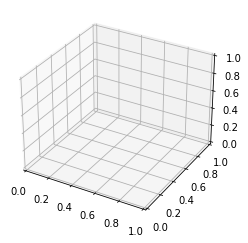

In [70]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = tuning_df["mean_charge_time_weight"]
Y = tuning_df["minimum_weight"]
Z = tuning_df["error"]
Z = tuning_df["minimum_weight"]


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



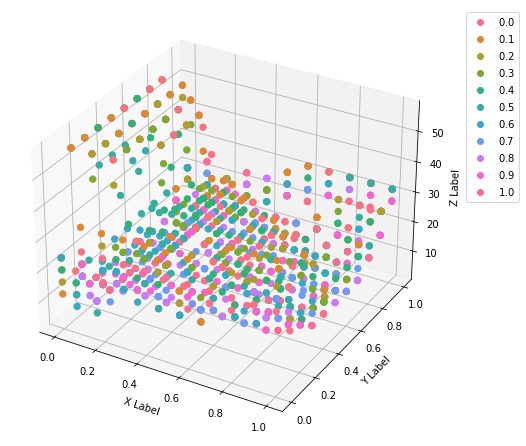

In [74]:
import re, seaborn as sns

import numpy as np

 

from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import ListedColormap

 

# generate data

x = tuning_df["mean_charge_time_weight"]
y = tuning_df["minimum_weight"]
z = tuning_df["error"]

w = tuning_df["variance_weight"]

 

# axes instance

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

fig.add_axes(ax)

 

# get colormap from seaborn

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

 

# plot

sc = ax.scatter(x, y, z, s=40, c=w, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel('X Label')

ax.set_ylabel('Y Label')

ax.set_zlabel('Z Label')

 

# legend

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

 

# save

plt.savefig("error_scatter.png", bbox_inches='tight')

/Users/farihahahmed/opt/miniconda3/envs/battery_project/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning:

The following kwargs were not used by contour: 'edgecolor'



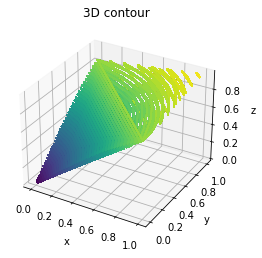

In [79]:
from mpl_toolkits import mplot3d

import numpy as np

import matplotlib.pyplot as plt

def f(x, y):

   return np.sin(np.sqrt(x ** 2 + y ** 2))

   

x = tuning_df["mean_charge_time_weight"]
y = tuning_df["minimum_weight"]
#z = tuning_df["error"]
x, y = np.meshgrid(x, y)
z = f(x, y)

 

fig = plt.figure()

ax = plt.axes(projection='3d')

ax.contour3D(x, y, z, 50, cmap='viridis', edgecolor='none')

#ax.plot_surface(X, Y, 50, rstride=1, cstride=1,

#                cmap='viridis', edgecolor='none')

 

ax.set_xlabel('x')

ax.set_ylabel('y')

ax.set_zlabel('z')

ax.set_title('3D contour')

plt.show()

 

In [81]:
z.shape

(1331, 1331)